In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression #Pour ElasticNet
from sklearn.linear_model import SGDRegressor, SGDClassifier, Lasso, ElasticNet

In [89]:
train = pd.read_csv('D:/Documents/cours/INSA/5A/Projet_Intégrateur/data/519dataframe.csv')
test = pd.read_csv('D:/Documents/cours/INSA/5A/Projet_Intégrateur/data/519dataframe.csv')
print(train)
# idstation | annee | num_semaine | jour_semaine | heure | nb_arrives | nb_departs | entier_weather

                            data  label
0       [2013.0, 21.0, 6.0, 0.0]      0
1       [2013.0, 21.0, 6.0, 1.0]      0
2       [2013.0, 21.0, 6.0, 2.0]      0
3       [2013.0, 21.0, 6.0, 3.0]      0
4       [2013.0, 21.0, 6.0, 4.0]      0
...                          ...    ...
38635  [2017.0, 43.0, 5.0, 19.0]     61
38636  [2017.0, 43.0, 5.0, 20.0]     25
38637  [2017.0, 43.0, 5.0, 21.0]     19
38638  [2017.0, 43.0, 5.0, 22.0]      6
38639  [2017.0, 43.0, 5.0, 23.0]     10

[38640 rows x 2 columns]


In [90]:
X = []
Y = []
for i in train['data'] :
    temp=[]
    a=i.replace("[","").replace("]","").replace(".0","").split(",")
    for b in a :
        temp.append(int(b))
    X.append(temp)
    
for i in train['label'] :
    Y.append(int(i))
        
#print(X)    
#print(Y)

Text(0.5, 1.0, 'SDGRegressor')

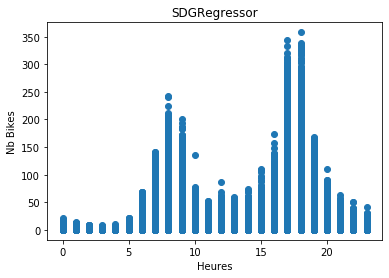

In [91]:
xs=[]
for b in X :
    xs.append(b[3])
    
fig, ax = plt.subplots()
ax.scatter(xs, train["label"])
plt.xlabel("Heures")
plt.ylabel("Nb Bikes")
plt.title("SDGRegressor")

In [92]:
trainsize=0.7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size=trainsize)

In [93]:
print("X_train => \n"+str(X_train)+"\n\n")
print("Y_train => \n"+str(Y_train)+"\n\n")
print("X_test => \n"+str(X_test)+"\n\n")
print("Y_test => \n"+str(Y_test)+"\n\n")

X_train => 
[[2017, 10, 5, 5], [2016, 14, 4, 23], [2017, 7, 1, 10], [2017, 39, 5, 12], [2015, 22, 2, 16], [2016, 6, 5, 7], [2016, 3, 2, 7], [2014, 49, 1, 23], [2016, 38, 4, 20], [2014, 6, 1, 7], [2014, 24, 3, 5], [2014, 25, 3, 3], [2016, 3, 3, 13], [2013, 36, 1, 18], [2015, 44, 3, 4], [2014, 32, 5, 22], [2016, 18, 2, 9], [2013, 22, 1, 13], [2016, 14, 1, 9], [2017, 14, 1, 19], [2017, 40, 6, 7], [2013, 29, 1, 14], [2016, 17, 2, 10], [2016, 27, 6, 10], [2015, 8, 2, 18], [2013, 37, 0, 20], [2013, 32, 0, 8], [2015, 52, 4, 9], [2017, 27, 0, 13], [2015, 22, 1, 0], [2013, 25, 2, 15], [2014, 50, 2, 7], [2015, 42, 4, 23], [2015, 2, 6, 10], [2013, 34, 6, 9], [2014, 37, 3, 16], [2017, 18, 3, 9], [2016, 40, 4, 11], [2014, 37, 3, 20], [2013, 40, 3, 23], [2014, 42, 6, 17], [2014, 43, 2, 16], [2014, 15, 4, 8], [2014, 20, 3, 22], [2016, 17, 5, 14], [2017, 41, 4, 14], [2014, 35, 2, 21], [2017, 23, 3, 2], [2013, 33, 1, 22], [2015, 42, 3, 5], [2017, 41, 3, 0], [2015, 25, 2, 19], [2014, 12, 1, 23], [2016, 

In [94]:
clf=SGDRegressor(loss="squared_loss", penalty=None)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
#err=y_pred-Y_train
#total_error=np.dot(err,err)
#rmse_train=np.sqrt(total_error/len(y_pred))
score=clf.score(X_test,Y_test)
#print("err = "+str(err)+"\n")
#print("total_error = "+str(total_error)+"\n")
#print("rmse_train = "+str(rmse_train)+"\n")
print("r2_score = "+str(r2_score(Y_test, y_pred))+"\n")
print("score = "+str(score)+"\n")
# Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire).
# Un modèle constant qui prédit toujours la valeur attendue de y, sans tenir compte des caractéristiques d'entrée, 
# obtiendrait un score R ^ 2 de 0,0.

r2_score = -1.2505268110743833e+26

score = -1.2505268110743833e+26



In [84]:
x_pred=[]
for b in X_test :
    x_pred.append(b[3])

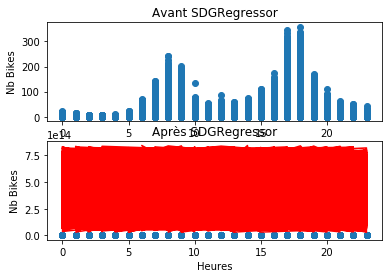

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(xs, train["label"])
ax1.set_xlabel("Heures")
ax1.set_ylabel("Nb Bikes")
ax1.set_title("Avant SDGRegressor")

ax2.scatter(xs, train["label"])
ax2.set_xlabel("Heures")
ax2.set_ylabel("Nb Bikes")
ax2.set_title("Après SDGRegressor")
#x_plot = list(range(0,24,1))
#x_plot = np.array(x_plot).reshape(-1, 1)
#y_plot = clf.predict(x_plot)

#x_plot = list(range(0,24,2))
#print(x_pred)
#x_plot = np.array(x_plot).reshape(-1, 1)
#y_plot = clf.predict(x_pred)

#ax.plot(x_plot, y_plot, color="r")
ax2.plot(x_pred, y_pred, color="r")
#ax.plot(range(0,24), y_pred)
#plt.plot(range(0,24), , c='r', label="SGDRegressor")
#plt.title("SGDRgressor")
#plt.xlabel("Hours")
#plt.ylabel("BikesNumber")

In [86]:
#x_plot = list(range(0,24,2))
#print(x_pred)
x_plot = np.array(x_pred).reshape(-1, 1)
y_plot = clf.predict(x_plot)
print(y_plot)

ValueError: shapes (11592,1) and (4,) not aligned: 1 (dim 1) != 4 (dim 0)

In [17]:
# Traitement des donnees
# nombre de départ par station ET en fonction du temps
# X = (idstation, année, numero_semaine, num_jour, heure, BikeOut, BikesIn, météo)
# Y = nb de départ (pour la station X_i et les autres paramètres rentrées en X)

def X(data) :
    return pd.DataFrame(data = {
        'idstation' : data['519'],
        'year' : data['2013'],
        'weekofyear' : data['21'],
        'dayofweek' : data['6'],
        'hour' : data['0'],
        'out' : data['0.1'],
        'in' : data['0.2'],
        'weather' : data['1'],
    })

def Y(data) :
    return pd.DataFrame(data = {
        'idstation' : data['519'],
        'year' : data['2013'],
        'weekofyear' : data['21'],
        'dayofweek' : data['6'],
        'hour' : data['0'],
        'out' : data['0.1'],
        'in' : data['0.2'],
        'weather' : data['1'],
    })


def trie_station(data) :
    num = np.array(pd.DataFrame(set(data['stationid']))[:20])
    print("NUM => \n"+str(num)+"\n\n\n")
    training = []
    for i in range(len(num)) :
        for j in range(len(data['stationid'])) :
            if data['stationid'][j] == num[i] :
                training.append(data['stationid'][i])
    return training

In [30]:
def tab(data) :
    return "".join(data)

X_train=tab(X_train)
print(X_train)

[2013.0, 26.0, 3.0, 14.0]
[2013.0, 47.0, 6.0, 17.0]
[2017.0, 36.0, 5.0, 11.0]
[2017.0, 25.0, 6.0, 5.0]
[2016.0, 41.0, 0.0, 4.0]
[2017.0, 4.0, 3.0, 10.0]
[2017.0, 24.0, 0.0, 17.0]
[2014.0, 32.0, 3.0, 22.0]
[2014.0, 16.0, 5.0, 9.0]
[2013.0, 44.0, 1.0, 14.0]
[2014.0, 9.0, 4.0, 5.0]
[2013.0, 31.0, 1.0, 20.0]
[2015.0, 28.0, 4.0, 20.0]
[2017.0, 21.0, 2.0, 12.0]
[2015.0, 11.0, 2.0, 1.0]
[2016.0, 12.0, 1.0, 19.0]
[2017.0, 16.0, 5.0, 18.0]
[2016.0, 44.0, 3.0, 22.0]
[2016.0, 49.0, 3.0, 5.0]
[2015.0, 40.0, 4.0, 8.0]
[2016.0, 1.0, 2.0, 23.0]
[2017.0, 4.0, 2.0, 16.0]
[2014.0, 14.0, 0.0, 1.0]
[2016.0, 2.0, 5.0, 8.0]
[2015.0, 13.0, 1.0, 2.0]
[2016.0, 36.0, 4.0, 2.0]
[2015.0, 47.0, 1.0, 7.0]
[2014.0, 34.0, 0.0, 1.0]
[2013.0, 28.0, 1.0, 8.0]
[2016.0, 35.0, 2.0, 15.0]
[2017.0, 30.0, 5.0, 23.0]
[2014.0, 39.0, 3.0, 5.0]
[2015.0, 22.0, 6.0, 5.0]
[2015.0, 45.0, 6.0, 7.0]
[2013.0, 25.0, 6.0, 6.0]
[2017.0, 38.0, 3.0, 3.0]
[2014.0, 33.0, 6.0, 7.0]
[2017.0, 9.0, 4.0, 22.0]
[2016.0, 8.0, 1.0, 13.0]
[2014.0, 28.0

In [39]:
X_train.replace("'","")
#Y_train.replace("'","")

14764      [2015.0, 5.0, 5.0, 4.0]
32022      [2017.0, 4.0, 3.0, 6.0]
1231      [2013.0, 29.0, 1.0, 7.0]
24309    [2016.0, 10.0, 3.0, 21.0]
8191      [2014.0, 18.0, 4.0, 7.0]
                   ...            
1807      [2013.0, 32.0, 4.0, 7.0]
29667     [2016.0, 42.0, 3.0, 3.0]
35959     [2017.0, 27.0, 6.0, 7.0]
30771     [2016.0, 49.0, 0.0, 3.0]
819       [2013.0, 26.0, 5.0, 3.0]
Name: data, Length: 27048, dtype: object

In [55]:
t=[]
for i in X_train :
    t.append(i)
    
print(t)

['[2015.0, 5.0, 5.0, 4.0]', '[2017.0, 4.0, 3.0, 6.0]', '[2013.0, 29.0, 1.0, 7.0]', '[2016.0, 10.0, 3.0, 21.0]', '[2014.0, 18.0, 4.0, 7.0]', '[2015.0, 51.0, 5.0, 2.0]', '[2013.0, 41.0, 0.0, 3.0]', '[2017.0, 26.0, 6.0, 9.0]', '[2015.0, 39.0, 5.0, 8.0]', '[2015.0, 25.0, 0.0, 22.0]', '[2013.0, 48.0, 3.0, 17.0]', '[2013.0, 48.0, 3.0, 16.0]', '[2016.0, 8.0, 1.0, 15.0]', '[2013.0, 39.0, 3.0, 17.0]', '[2013.0, 36.0, 1.0, 21.0]', '[2014.0, 6.0, 6.0, 9.0]', '[2015.0, 26.0, 6.0, 13.0]', '[2015.0, 27.0, 2.0, 23.0]', '[2015.0, 20.0, 0.0, 4.0]', '[2015.0, 40.0, 6.0, 15.0]', '[2015.0, 33.0, 3.0, 13.0]', '[2014.0, 41.0, 3.0, 12.0]', '[2014.0, 23.0, 3.0, 9.0]', '[2013.0, 42.0, 5.0, 1.0]', '[2014.0, 29.0, 3.0, 18.0]', '[2015.0, 27.0, 4.0, 11.0]', '[2014.0, 48.0, 3.0, 21.0]', '[2017.0, 33.0, 5.0, 6.0]', '[2017.0, 9.0, 1.0, 0.0]', '[2015.0, 15.0, 0.0, 21.0]', '[2016.0, 23.0, 2.0, 3.0]', '[2017.0, 8.0, 6.0, 19.0]', '[2015.0, 22.0, 5.0, 2.0]', '[2015.0, 44.0, 5.0, 18.0]', '[2013.0, 36.0, 1.0, 22.0]', '[2013

In [27]:
clf = Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
Lasso_pred=clf.predict(X_test)
print("r2_score = "+str(r2_score(Y_test,Lasso_pred))+"\n")
Lasso(alpha=0.1)

r2_score = 0.9999997901662849



Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)